In [3]:
import pandas as pd
import numpy as np
import math
import scipy
from scipy.stats import norm
from math import sqrt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [4]:
df= pd.read_csv(r"acs2015_census_tract_data.csv")

In [5]:
test=df[['State','County','TotalPop','Men','Women','White','Hispanic','Black','Asian','Pacific','Citizen','Income','IncomeErr','IncomePerCap','Poverty','ChildPoverty','Employed','Unemployment']]

In [6]:

new=test.assign(PoC=lambda x:(x['Hispanic']+x['Black']+x['Asian']+x['Pacific']))

new['PoC'].mean()
new.PoC

0         9.2
1        56.4
2        20.3
3        14.2
4        29.3
         ... 
73996    99.7
73997    99.7
73998    99.7
73999    98.8
74000    99.3
Name: PoC, Length: 74001, dtype: float64

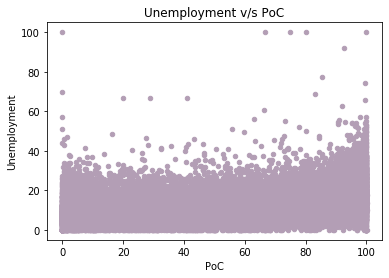

In [19]:
new.plot.scatter(x='PoC',y='Unemployment',c='#b39eb5',title="Unemployment v/s PoC")


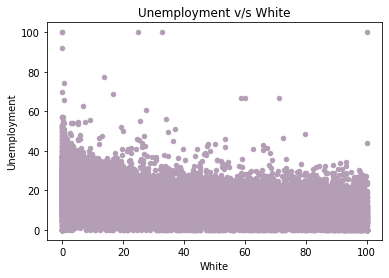

In [20]:
new.plot.scatter(x='White',y='Unemployment',c='#b39eb5',title="Unemployment v/s White")

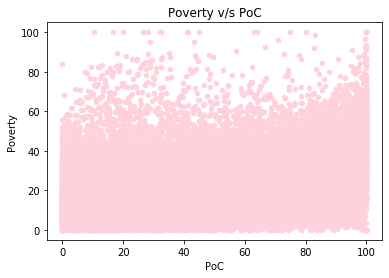

In [21]:
new.plot.scatter(x='PoC',y='Poverty',c='#ffd1dc',title="Poverty v/s PoC")

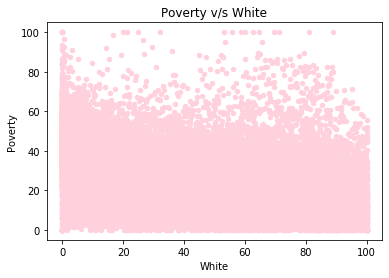

In [22]:
new.plot.scatter(x='White',y='Poverty',c='#ffd1dc',title='Poverty v/s White')

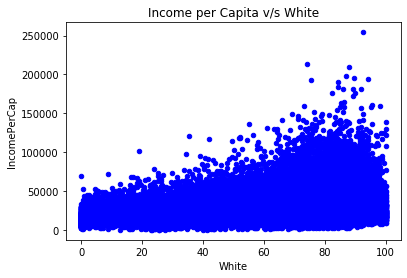

In [23]:
new.plot.scatter(x='White',y='IncomePerCap',c='blue',title='Income per Capita v/s White')

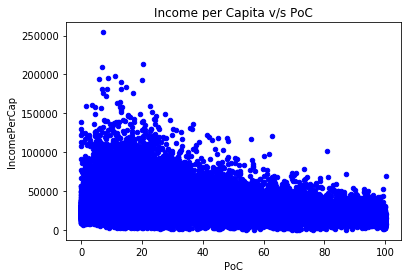

In [24]:
new.plot.scatter(x='PoC',y='IncomePerCap',c='blue',title='Income per Capita v/s PoC')

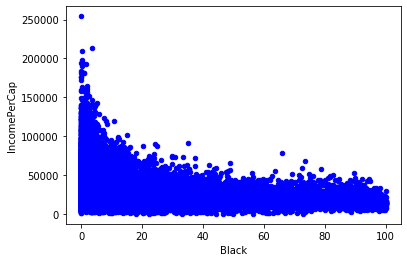

In [25]:
new.plot.scatter(x='Black',y='IncomePerCap',c='blue')

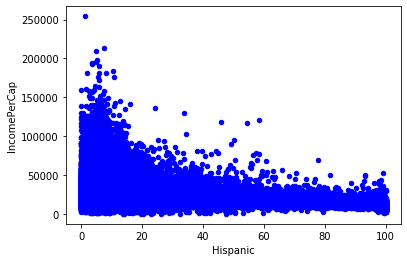

In [26]:
new.plot.scatter(x='Hispanic',y='IncomePerCap',c='blue')

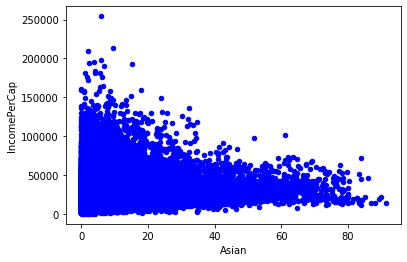

In [27]:
new.plot.scatter(x='Asian',y='IncomePerCap',c='blue')

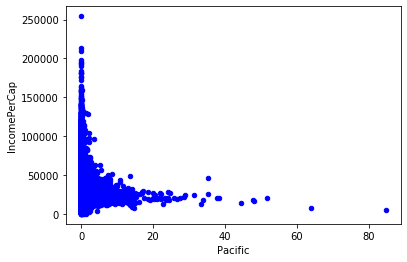

In [28]:
new.plot.scatter(x='Pacific',y='IncomePerCap',c='blue')

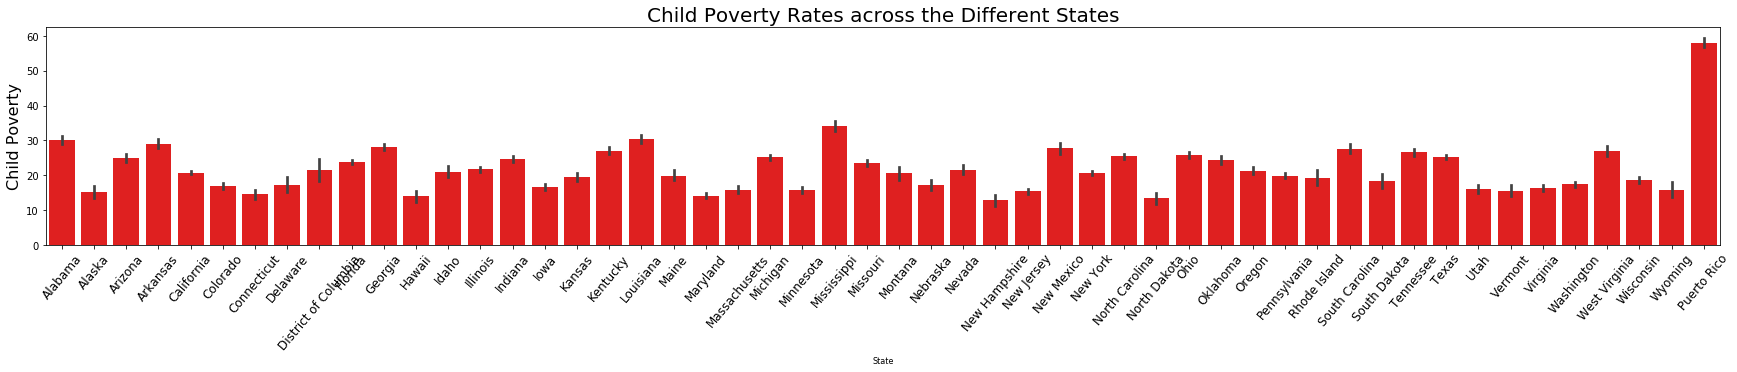

In [29]:
y=new["ChildPoverty"]
x =new["State"]
plt.figure(figsize=(30,4))
ax=sns.barplot(y = y, x = x,color='r')
plt.xlabel(xlabel='State', fontsize=8)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='Child Poverty', fontsize=16)
plt.title(label='Child Poverty Rates across the Different States', fontsize=20)
plt.show()

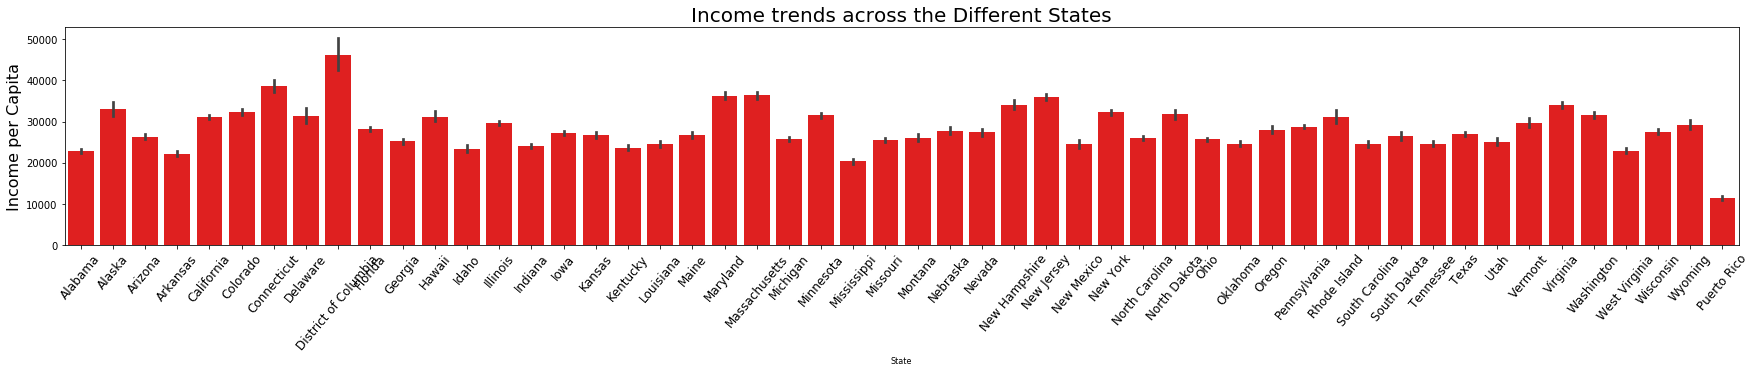

In [30]:
y=new["IncomePerCap"]
x =new["State"]
plt.figure(figsize=(30,4))
ax=sns.barplot(y = y, x = x,color='r')
plt.xlabel(xlabel='State', fontsize=8)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='Income per Capita', fontsize=16)
plt.title(label='Income trends across the Different States', fontsize=20)
plt.show()

In [31]:
emp_perc=['PrivateWork','PublicWork','SelfEmployed','FamilyWork']
df[emp_perc]=df[emp_perc].multiply(df["Employed"], axis="index")/100

In [32]:
df = df.drop(['IncomeErr','IncomePerCap','IncomePerCapErr'], axis=1)

df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Text(0.5, 1, 'Heatmap showing missing values- After cleaning')

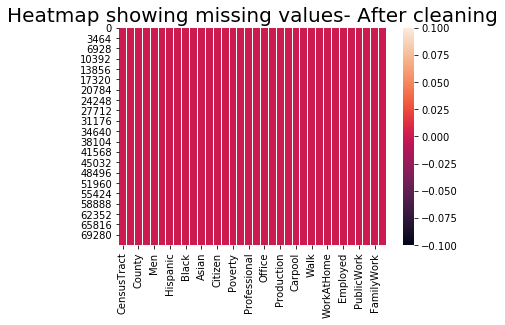

In [33]:
sns.heatmap(df.isnull())
plt.title('Heatmap showing missing values- After cleaning', fontsize = 20)

In [34]:
df.corr()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,1.000000,-0.027036,-0.028367,-0.024857,-0.016463,0.076756,-0.019592,-0.002559,-0.153128,-0.055364,...,0.038915,-0.082312,-0.097997,-0.038033,-0.021115,-0.023852,0.026172,-0.075390,-0.014995,-0.053212
TotalPop,-0.027036,1.000000,0.983261,0.983965,0.109162,-0.029007,-0.110236,-0.034637,0.101359,0.025242,...,-0.113239,-0.060102,-0.013403,0.104409,0.922794,0.896892,0.679176,0.551323,0.140465,-0.126437
Men,-0.028367,0.983261,1.000000,0.934995,0.116731,-0.018096,-0.134785,-0.029844,0.100555,0.029251,...,-0.100154,-0.049172,-0.003121,0.096912,0.898933,0.873383,0.659235,0.545064,0.141398,-0.134667
Women,-0.024857,0.983965,0.934995,1.000000,0.098213,-0.038748,-0.082630,-0.038206,0.098860,0.020499,...,-0.122376,-0.068852,-0.023035,0.108363,0.916233,0.890825,0.676677,0.539574,0.134997,-0.114281
Hispanic,-0.016463,0.109162,0.116731,0.098213,1.000000,-0.659432,-0.116684,-0.039617,0.031586,0.018792,...,0.024226,0.120483,-0.153905,0.119823,0.018455,0.030653,-0.062699,0.067733,-0.019954,0.225366
White,0.076756,-0.029007,-0.018096,-0.038748,-0.659432,1.000000,-0.582281,-0.073969,-0.253124,-0.095083,...,-0.072375,-0.141665,0.241654,-0.207241,0.072253,0.062614,0.051956,0.112460,0.063722,-0.495322
Black,-0.019592,-0.110236,-0.134785,-0.082630,-0.116684,-0.582281,1.000000,-0.052400,-0.107871,-0.037519,...,0.014719,0.031212,-0.205652,0.105645,-0.177419,-0.173902,-0.054097,-0.262390,-0.073042,0.484606
Native,-0.002559,-0.034637,-0.029844,-0.038206,-0.039617,-0.073969,-0.052400,1.000000,-0.041271,0.008686,...,0.052934,0.044938,0.027666,-0.066130,-0.065282,-0.086386,0.045855,-0.038689,0.003045,0.092296
Asian,-0.153128,0.101359,0.100555,0.098860,0.031586,-0.253124,-0.107871,-0.041271,1.000000,0.164839,...,0.107277,0.050853,0.049665,0.188495,0.160053,0.168130,0.065465,0.097962,0.011678,-0.107583
Pacific,-0.055364,0.025242,0.029251,0.020499,0.018792,-0.095083,-0.037519,0.008686,0.164839,1.000000,...,0.007523,0.054378,-0.004487,0.000378,0.017228,0.011151,0.034998,0.011852,0.004586,0.005461


In [35]:
columns = list(df.columns.values)
columns.pop(columns.index('Income')) 
df = df[columns+['Income']]

In [36]:
x = df.iloc[:,3:-1].values
y = df['Income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=52)

linearreg_model = LinearRegression()
linearreg_model.fit(x_train, y_train)
y_pred = linearreg_model.predict(x_test)

mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)

(222109558.513096, 10529.286470220819, 0.7235291674782788)

In [37]:


x_normalised = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_normalised, y, test_size = 0.25, random_state=62)

std_linearreg_model = LinearRegression()
std_linearreg_model.fit(x_train, y_train)
y_pred = std_linearreg_model.predict(x_test)

mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred) , r2_score(y_test, y_pred)

(225569092.3411058, 10547.842713787431, 0.7288808744585895)

In [38]:


poly = PolynomialFeatures(degree = 2) 
x_train, x_test, y_train, y_test = train_test_split(x_normalised, y, test_size = 0.35, random_state=61)
x_train_2 = poly.fit_transform(x_train)
x_test_2 = poly.transform(x_test)

poly_linearreg_model = LinearRegression()
poly_linearreg_model.fit(x_train_2, y_train)
y_pred2 = poly_linearreg_model.predict(x_test_2)

mean_squared_error(y_test, y_pred2, squared=False), mean_absolute_error(y_test, y_pred2) , r2_score(y_test, y_pred2)

(12149.174678851085, 8031.293853241472, 0.82101006902304)

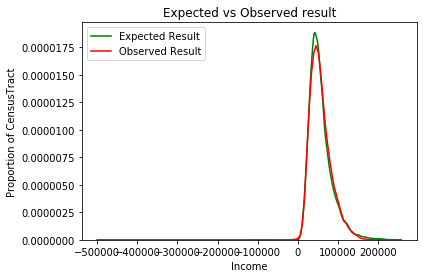

In [41]:

plt.figure()
ax1 = sns.distplot(y_test,  color="g", label="Expected Result",hist=False)
sns.distplot(y_pred2,  color="r", label="Observed Result" , ax=ax1,hist=False)

plt.title('Expected vs Observed result')
plt.xlabel('Income')
plt.ylabel('Proportion of CensusTract')

plt.show()
plt.close()

In [40]:

poly.fit_transform(x_normalised)
x_normalised_p = poly.transform(x_normalised)
cross_val_score(poly_linearreg_model, x_normalised_p, y, cv=4).mean()

0.8199616563262346

In [42]:

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2,include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
X = df.iloc[:,3:-1].values
y = df['Income']
cross_val_score(pipe, X, y, cv=4).mean()

0.8199620500338294

In [47]:

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_normalised_p, y)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2,include_bias=False)), ('model',Ridge(alpha=1000))]
pipe=Pipeline(Input)
cross_val_score(pipe, X, y, cv=4).mean()

0.8225460877180747